# Permanent hpmap array rotation

In [1]:
# sky map
import matplotlib.pyplot as plt
import os
import sys
from radiocalibrationtoolkit import *

[INFO] LFmap: Import successful.


In [2]:
################################################################################################################
# THIS IS NOT RECOMMENED APPROACH, THE HP MAP ARRAYs SHOULD BE ALWAYS BY DEFAULT IN GALACTIC COORDINATE SYSTEM #
################################################################################################################

In [3]:
# some global plot settings
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize']= 14

plt.rcParams['xtick.major.width']= 2
plt.rcParams['ytick.major.width']= 2

plt.rcParams['xtick.major.size']= 5
plt.rcParams['ytick.major.size']= 5

plt.rcParams['xtick.labelsize']= 14
plt.rcParams['ytick.labelsize']= 14

In [4]:
# create instance of galactic map
frequency_MHz = 45

gsm2016 = GlobalSkyModel2016(freq_unit="MHz")
gsm2016_map = gsm2016.generate(frequency_MHz)

# convert it to custom NSIDE, THE CONVERSION IS NOT NEEDED
new_nside = 128
gsm2016_map_N = hp.ma(hp.pixelfunc.ud_grade(gsm2016_map, new_nside))


In [5]:
# set lst, latitude and create rotation parameters for projview function
lst = 18
latitude = -35.206667
rotation_parameters = create_rotation_parameters(lst, latitude)

In [6]:
# just pass the example map to "m" variable
m = gsm2016_map_N
# reindexing array to local coordinates
m_rotated = rotate_default_hpmap_array_from_galactic2local_coordinates(m, lst, latitude)

In [7]:
# inverse operation, reindexing rotated array back to the Galactic coordinates
m_rotated_and_reverse_rotate = rotate_default_hpmap_array_from_galactic2local_coordinates(m_rotated, lst, latitude, inv=True)

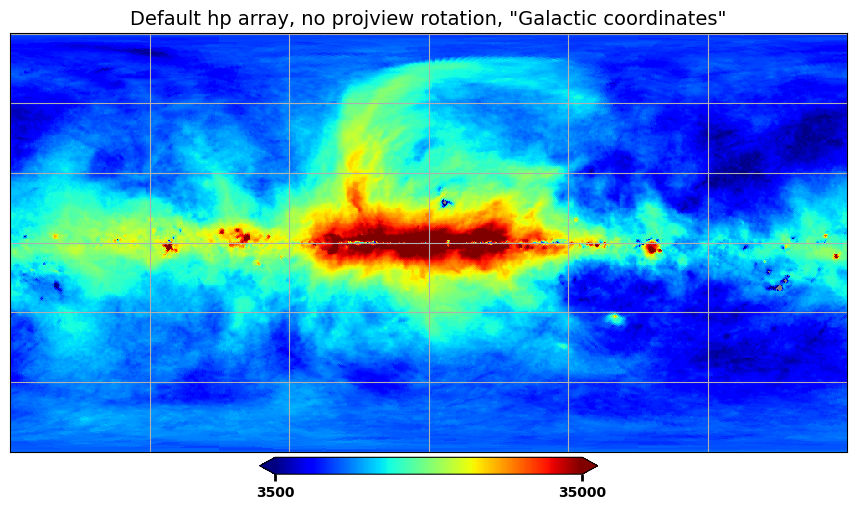

In [8]:
projview(
    m,
    norm='log',
    cmap='jet',
    graticule=True,
    return_only_data=False,
    # coord=["G",'C'],
    # rot=rotation_parameters,
    # invRot=True,
    min=3500,
    max=35000,
    projection_type='cart',
    title='Default hp array, no projview rotation, "Galactic coordinates"'
)

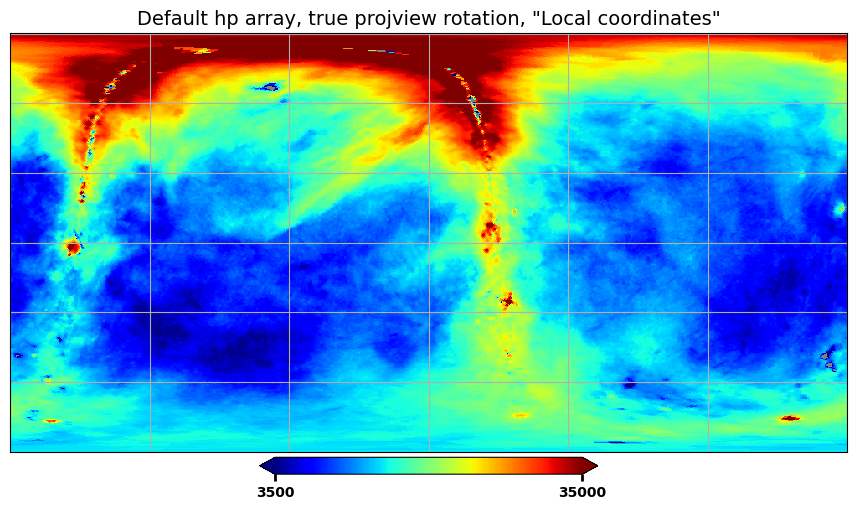

In [9]:
projview(
    m,
    norm='log',
    cmap='jet',
    graticule=True,
    return_only_data=False,
    coord=["G",'C'],
    rot=rotation_parameters,
    invRot=True,
    min=3500,
    max=35000,
    projection_type='cart',
    title='Default hp array, true projview rotation, "Local coordinates"'
)

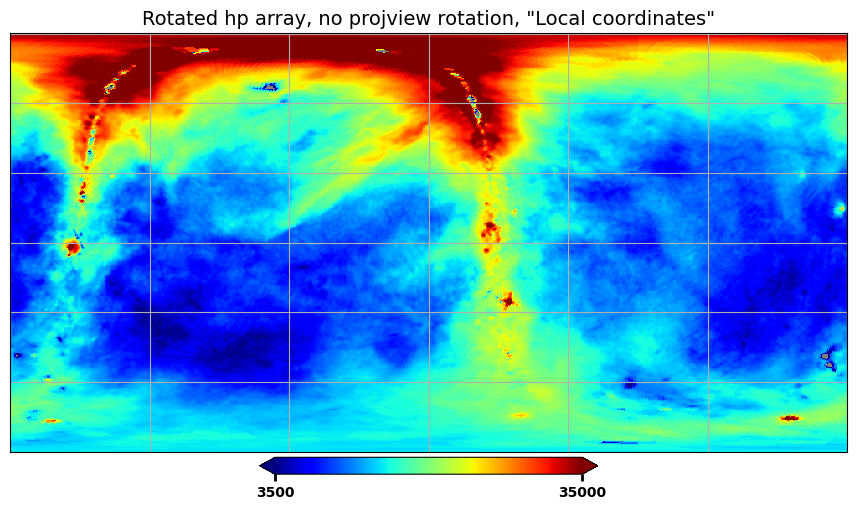

In [10]:
projview(
    m_rotated,
    norm='log',
    cmap='jet',
    graticule=True,
    return_only_data=False,
    # coord=["G",'C'],
    # rot=rotation_parameters,
    # invRot=True,
    min=3500,
    max=35000,
    projection_type='cart',
    title='Rotated hp array, no projview rotation, "Local coordinates"'
)

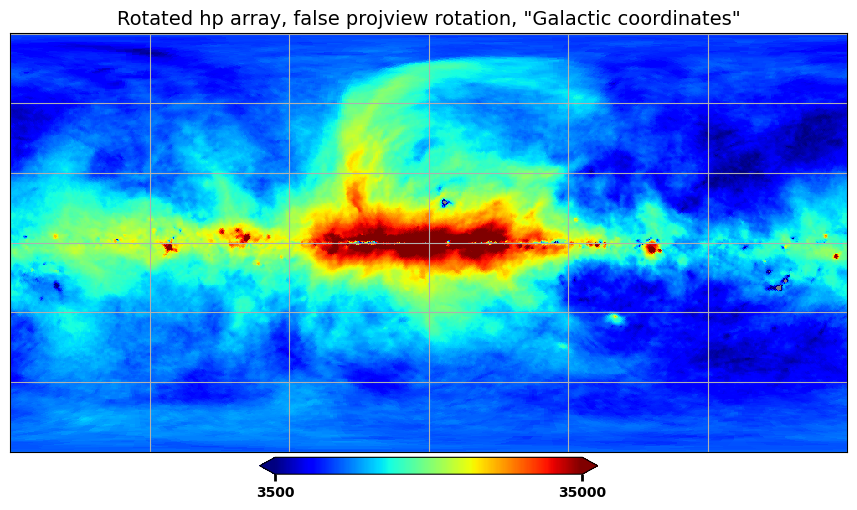

In [11]:
projview(
    m_rotated,
    norm='log',
    cmap='jet',
    graticule=True,
    return_only_data=False,
    coord=["G",'C'],
    rot=rotation_parameters,
    invRot=False,
    min=3500,
    max=35000,
    projection_type='cart',
    title='Rotated hp array, false projview rotation, "Galactic coordinates"'
)

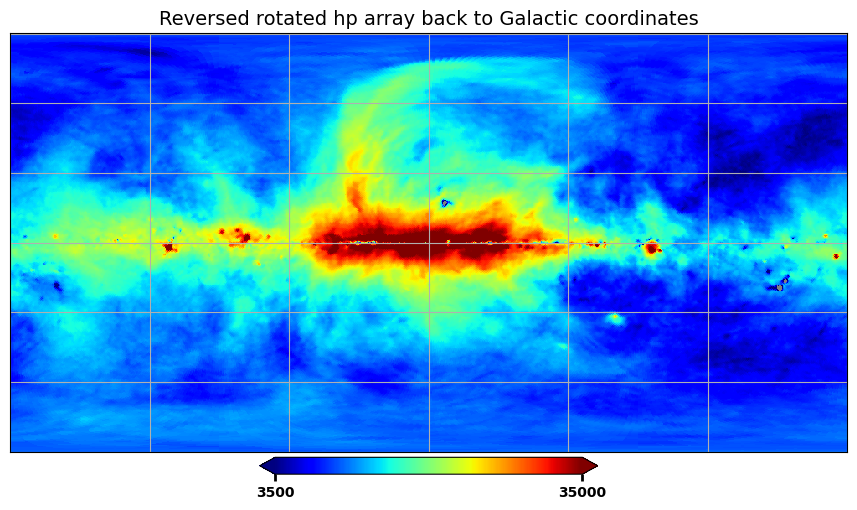

In [12]:
projview(
    m_rotated_and_reverse_rotate,
    norm='log',
    cmap='jet',
    graticule=True,
    return_only_data=False,
    # coord=["G",'C'],
    # rot=rotation_parameters,
    # invRot=True,
    min=3500,
    max=35000,
    projection_type='cart',
    title='Reversed rotated hp array back to Galactic coordinates'
)

In [13]:
# numerical check after the rotation, the differences should be very small, e.g., of order 
# convert it to custom NSIDE, THE CONVERSION IS NOT NEEDED
new_nside = 64
gsm2016_map_N = hp.ma(hp.pixelfunc.ud_grade(gsm2016_map, new_nside))
m = gsm2016_map_N
sums = []
for lst in range(24):
    sums.append(np.sum(rotate_default_hpmap_array_from_galactic2local_coordinates(m, lst, latitude)))
sums = np.asarray(sums)

Text(0, 0.5, '$\\frac{\\Sigma \\mathrm{pixel\\; values}}{\\Sigma \\mathrm{pixel\\; values\\; at\\; LST=0}} - 1$')

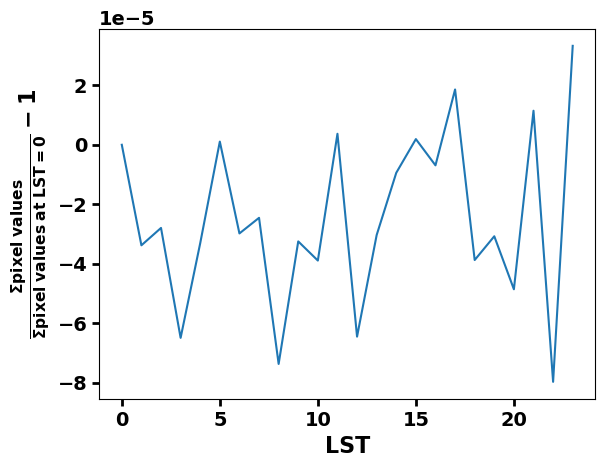

In [14]:
fig, ax = plt.subplots()
ax.plot(sums/sums[0] - 1)
ax.set_xlabel('LST')
ax.set_ylabel(r'$\frac{\Sigma \mathrm{pixel\; values}}{\Sigma \mathrm{pixel\; values\; at\; LST=0}} - 1$')